<a href="https://colab.research.google.com/github/tamagoyakitamagoyaki/q-macro/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas_datareader as pdr
import numpy as np

In [2]:
start_date = '1960-01-01'
end_date = '2022-01-01'

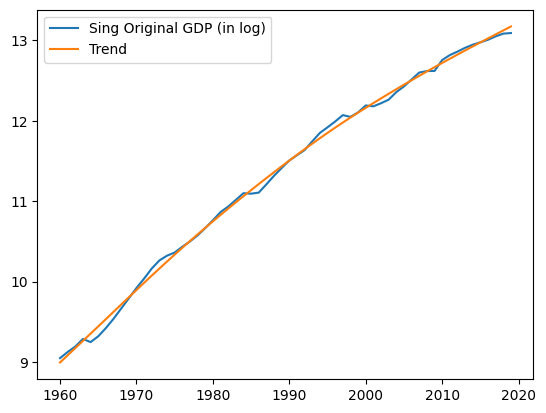

In [4]:
gdp_sing = web.DataReader('RGDPNASGA666NRUG', 'fred', start_date, end_date)
log_gdp_sing = np.log(gdp_sing)
gdp_pct_change_sing = gdp_sing.pct_change(4)
cycle_sing, trend_sing = sm.tsa.filters.hpfilter(log_gdp_sing, lamb=1600)
plt.plot(log_gdp_sing, label="Sing Original GDP (in log)")
plt.plot(trend_sing, label="Trend")
plt.legend()
plt.show()

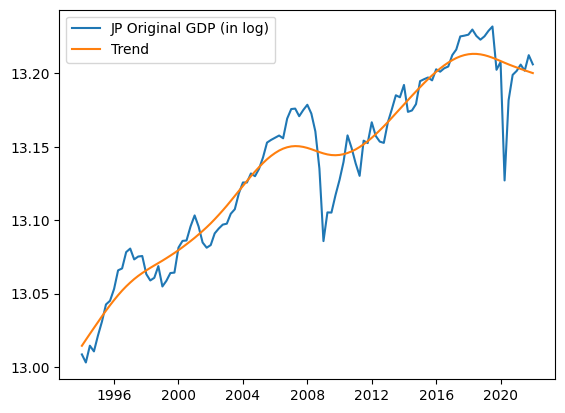

In [6]:
gdp_jp = web.DataReader('JPNRGDPEXP', 'fred', start_date, end_date)
log_gdp_jp = np.log(gdp_jp)
gdp_pct_change_jp = gdp_jp.pct_change(4)
cycle_jp, trend_jp = sm.tsa.filters.hpfilter(log_gdp_jp, lamb=1600)
plt.plot(log_gdp_jp, label="JP Original GDP (in log)")
plt.plot(trend_jp, label="Trend")
plt.legend()
plt.show()

In [7]:
cycle_sing_mean = cycle_sing.mean()
cycle_jp_mean = cycle_jp.mean()
cycle_sing_std = cycle_sing.std()
cycle_jp_std = cycle_jp.std()

print("Singapore Cycle mean:", cycle_sing_mean)
print("Japan Cycle mean:", cycle_jp_mean)
print("Singapore Cycle standard deviation:", cycle_sing_std)
print("Japan Cycle standard deviation:", cycle_jp_std)

Singapore Cycle mean: -3.251917253995392e-13
Japan Cycle mean: 1.9173649885101642e-13
Singapore Cycle standard deviation: 0.05295623051370461
Japan Cycle standard deviation: 0.016100214545195696


In [9]:
corrcoef = cycle_sing.corr(cycle_jp)
print("Correlation Coefficient between Sing and Jp:", corrcoef)

Correlation Coefficient between Sing and Jp: 0.2253974023524055


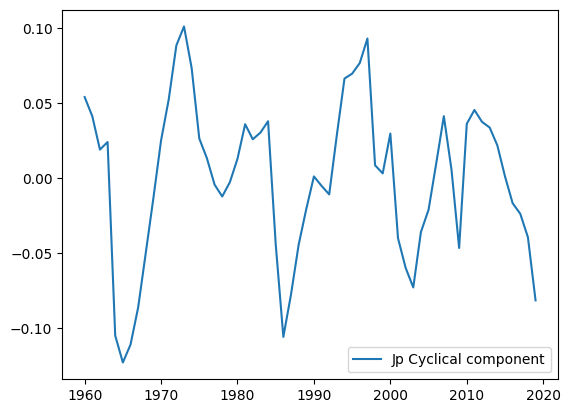

In [11]:
plt.plot(cycle_sing, label="Jp Cyclical component")

plt.legend()
plt.show()

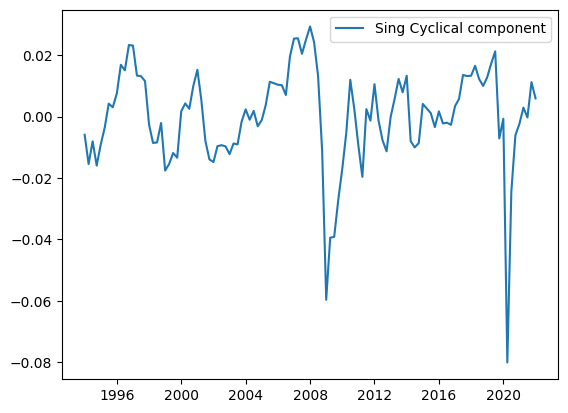

In [12]:
plt.plot(cycle_jp, label="Sing Cyclical component")
plt.legend()
plt.show()